In [32]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import wooldridge
from typing import *
from statsmodels.tools.eval_measures import rmse
sns.set(rc={'figure.figsize':(11.7,8.27)})
df = pd.read_stata("canada_test_scr.dta")
df
pd.set_option('display.float_format', lambda x: '%.6f' % x)

<AxesSubplot:xlabel='perc_attend_preschool', ylabel='math_scr'>

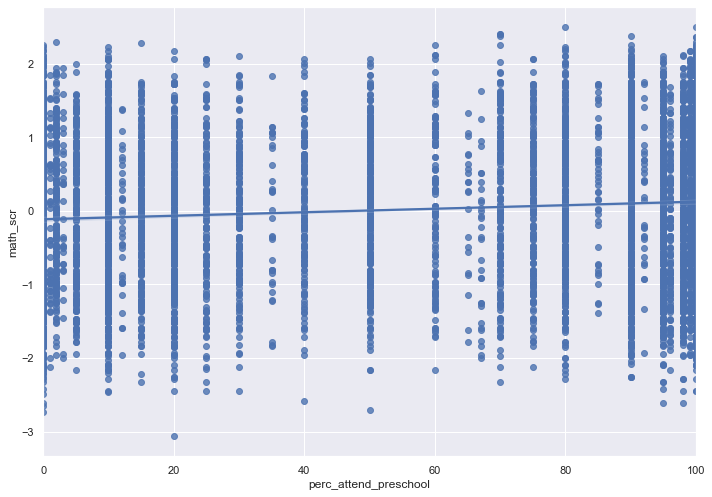

In [33]:
sns.regplot(x=df["perc_attend_preschool"],y=df["math_scr"], data=df)

# Qns 8

What is the percentage of students in the sample who do not possess a computer or a laptop at home? Round your answers to 2 decimal places. Pick the closest option.

In [34]:
# find the percentage of students with home_pc = 0.0 in df
no_pc: int = df["home_pc"].value_counts()[0]
total: int = df["home_pc"].count()
print(f"percentage of students with no pc: {no_pc/total:.2%}")

percentage of students with no pc: 38.62%


# Qns 9

What is the average number of people living in each student’s household? Round your answers to 2 decimal places.

In [35]:
# find average number of house_size in df
avg_house_size: float = df["house_size"].mean()
print(f"average house size: {avg_house_size:.2f}")

average house size: 4.57


# Qns 10

Run a regression of mathematics test score on the percentage of children in the student’s school who attended pre-school. Remember to include heteroskedasticity-robust standard errors. The output tells us that:

# Qns 11

Run a regression of mathematics test score on the percentage of children in the student’s school who attended pre-school. Remember to include heteroskedasticity-robust standard errors. Using the normal table, construct a 76.6% confidence interval for the coefficient on perc_attend_preschool. Round your answers to 6 decimal places. Pick the closest option.

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.77
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.63e-22
Time:                        13:57:06   Log-Likelihood:                -13768.
No. Observations:                9789   AIC:                         2.754e+04
Df Residuals:                    9787   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.11

<AxesSubplot:xlabel='perc_attend_preschool', ylabel='math_scr'>

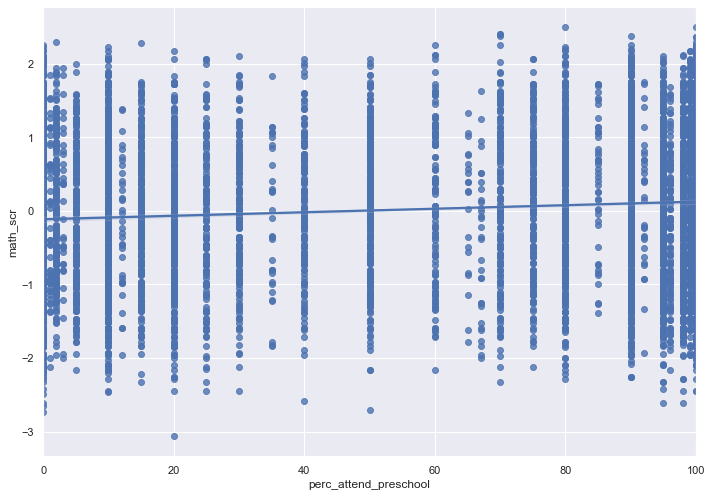

In [36]:
# Run a regression of math_scr on perc_attend_preschool
y = df["math_scr"]
x = df["perc_attend_preschool"]
model = smf.ols(formula="math_scr ~ perc_attend_preschool", data=df).fit(cov_type='HC3')
print(model.summary())
# find the 76.6% confidence interval for perc_attend_preschool
conf_int: np.ndarray = model.conf_int(0.234)
print(f"76.6% confidence interval: {conf_int[1:2]}")

regression = sp.stats.linregress(x, y)
print(regression)
sns.regplot(x=x, y=y, data=df)

# Qns 12

Refer to question 11. Suppose that perc_attend_preschool were instead a continuous variable indicating the proportion (not the percentage) of children in the student’s school who attended pre-school. How would your answer to question 11 change (i.e. what would be the 76.6% confidence interval for the coefficient on perc_attend_preschool now)? Round your answers to 6 significant figures.

# Qns 13

What would be the coefficient and the standard error on perc_attend_preschool now? 

In [52]:
new_df = df.copy()
new_df["perc_attend_preschool"] = new_df["perc_attend_preschool"]
new_df["math_scr"] = new_df["math_scr"]
y = new_df["math_scr"]
x = new_df["perc_attend_preschool"]
model = smf.ols(formula="math_scr ~ perc_attend_preschool", data=new_df).fit(cov_type='HC3')
print(model.summary())
# find the 76.6% confidence interval for perc_attend_preschool
conf_int: np.ndarray = model.conf_int(1 - 0.766)
print(f"76.6% confidence interval: {conf_int[1:2]}")

regression = sp.stats.linregress(x, y)
print(regression)
print(f"root mean square error: {rmse(y, model.predict(x))}")

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.77
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.63e-22
Time:                        15:35:59   Log-Likelihood:                -13768.
No. Observations:                9789   AIC:                         2.754e+04
Df Residuals:                    9787   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.11

In [38]:
new_df

,perc_disadvantaged,perc_attend_preschool,perc_health_problem,str,home_pc,livewithparents,house_size,math_scr,male
0,0.000000,70.000000,2.000000,9.100000,1.000000,0.000000,5.000000,-0.480435,1.000000
1,0.000000,70.000000,2.000000,9.100000,0.000000,1.000000,7.000000,-2.119622,1.000000
2,0.000000,70.000000,2.000000,9.100000,0.000000,1.000000,4.000000,-1.486255,0.000000
3,0.000000,70.000000,2.000000,9.100000,1.000000,1.000000,5.000000,0.264469,1.000000
4,0.000000,70.000000,2.000000,9.100000,1.000000,1.000000,4.000000,1.510291,1.000000
...,...,...,...,...,...,...,...,...,...
9784,10.000000,90.000000,20.000000,14.600000,0.000000,1.000000,3.000000,0.422811,1.000000
9785,10.000000,90.000000,20.000000,14.600000,0.000000,0.000000,4.000000,-1.817876,0.000000
9786,10.000000,90.000000,20.000000,14.600000,0.000000,0.000000,4.000000,-1.458371,0.000000
9787,10.000000,90.000000,20.000000,14.600000,0.000000,1.000000,3.000000,-1.596795,1.000000


# Qns 14

Run a regression of mathematics test score on the percentage of children in the student’s school from economically disadvantaged families. Remember to include heteroskedasticity-robust standard errors. Based on this regression, answer the following question: Giorgos is from a school where 70% of children are from economically disadvantaged families. Tim is from a school where 25% of children are from economically disadvantaged families. How much more or less is Giorgos’s math test score predicted to be compared to Tim’s, assuming they are alike in all other aspects apart from the percentage of children in their schools who are from economically disadvantaged families?

# Qns 15

Based on this regression, answer the following question: Jianhao obtained a math test score of -1.712315. Jianhao is from a school where 15% of children are from economically disadvantaged families. How large is the residual specific for Jianhao? Round your answer to 6 decimal places.

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           9.65e-37
Time:                        13:57:07   Log-Likelihood:                -13737.
No. Observations:                9789   AIC:                         2.748e+04
Df Residuals:                    9787   BIC:                         2.749e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1613      0

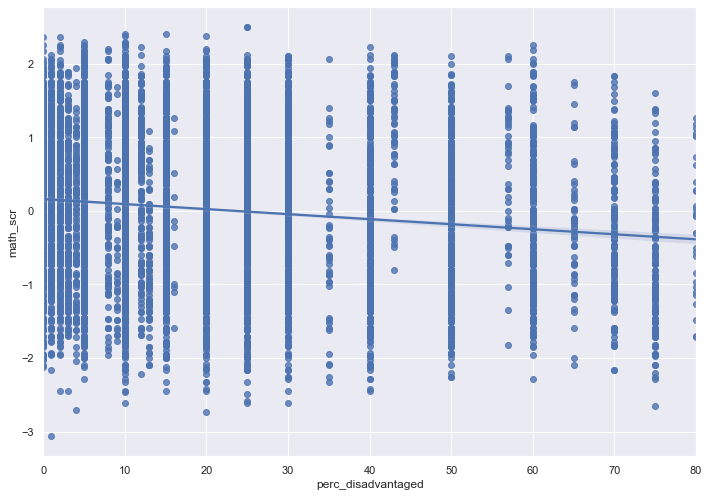

In [39]:
# run a regression of math_scr on perc_disadvantaged
y = df["math_scr"]
x = df["perc_disadvantaged"]
model = smf.ols(formula="math_scr ~ perc_disadvantaged", data=df).fit(cov_type='HC3')
print(model.summary())

regression = sp.stats.linregress(x, y)
print(regression)
sns.regplot(x=df["perc_disadvantaged"],y=df["math_scr"], data=df)

intercept: float = regression.intercept
coeff: float = regression.slope

# Qns 14
giorgnos: float =  intercept - coeff * (70.0)
tim: float = intercept - coeff * (25.0)
print(f"Ans 14: {giorgnos - tim}")

# Qns 15
# find math_scr when 15
math_scr: float = intercept + coeff * (15.0)
print(f"Ans 15: {-1.712315 - math_scr}")

# Qns 16

Examine the data on mathematics test score and the percentage of children in the student’s school with health problems. Then run a regression of mathematics test score on the percentage of children in the student’s school with health problems. Remember to include heteroskedasticity-robust standard errors. Based on this regression, answer the following question: Starley is from a school were 5% of students have health problems. Cindy is from a school were 97% of students have health problems. How much more or less is Cindy’s math test score predicted to be compared with Starely’s, assuming they are alike in all other aspects apart from the percentage of children in their school with health problems?

# Qns 17

Based on this regression, answer the following question: Suppose math test scores now increased by a factor of 50 (i.e. a math score of 1 now becomes 50. Similarly, a math score of 2 now becomes 100), what would the estimated coefficient on perc_health_problem be if this were the case? Round your answer to 4 significant figures.

In [40]:
# Qns 16
y = df["math_scr"]
x = df["perc_health_problem"]

model = smf.ols(formula="math_scr ~ perc_health_problem", data=df).fit(cov_type='HC3')
print(model.summary())

intercept: float = model.params.Intercept
coeff: float = model.params.perc_health_problem
Starley: float = intercept - coeff * (5.0)
Cindy: float = intercept - coeff * (97.0)
print(f"Ans 16: {Cindy - Starley}")
print("Isn't Cindy's score higher?")

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.25
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.95e-05
Time:                        13:57:08   Log-Likelihood:                -13807.
No. Observations:                9789   AIC:                         2.762e+04
Df Residuals:                    9787   BIC:                         2.763e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0740    

In [41]:
# multiply df["math_scr"] by 50
# Qns 17
new_df = df.copy()
new_df["math_scr"] = new_df["math_scr"] * 50
model = smf.ols(formula="math_scr ~ perc_health_problem", data=new_df).fit(cov_type='HC3')
print(model.summary())

print(f"coeff: {model.params['perc_health_problem']}")

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.25
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.95e-05
Time:                        13:57:08   Log-Likelihood:                -52101.
No. Observations:                9789   AIC:                         1.042e+05
Df Residuals:                    9787   BIC:                         1.042e+05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.7021    

# Qns 18

You are interested to know whether student-to-teacher ratio differs by student gender. In other words, you want to know whether, on average, males attend schools with larger (or smaller) student-to-teacher ratios compared to females. Run a regression which will allow you to examine this. Remember to include heteroskedasticity robust standard errors. What do the results tell you?

                            OLS Regression Results                            
Dep. Variable:                    str   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.49
Date:                Mon, 07 Mar 2022   Prob (F-statistic):            0.00120
Time:                        13:57:08   Log-Likelihood:                -28933.
No. Observations:                9789   AIC:                         5.787e+04
Df Residuals:                    9787   BIC:                         5.789e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4360      0.067    306.033      0.0

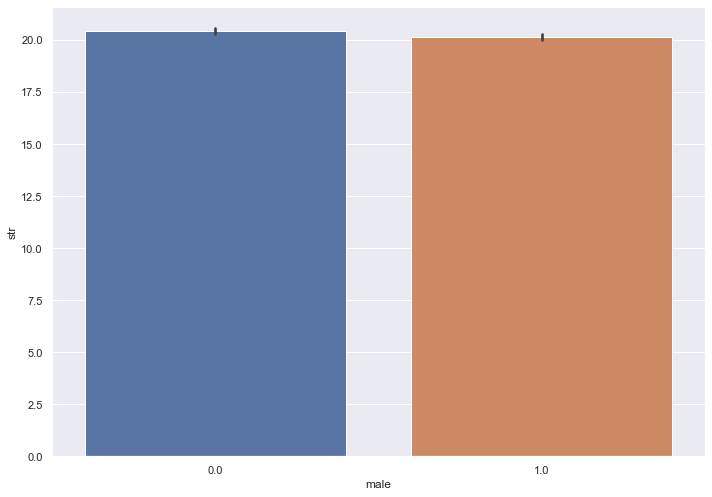

In [42]:
y = df["str"]
x = df["male"]
model = smf.ols(formula="str ~ male", data=df).fit(cov_type='HC3', fit_intercept=False, C=100000)
print(model.summary())

# plot a bar graph with house_size on the y axis and male on the x axis
sns.barplot(x=x, y=y, data=df)

# find the average house size
avg: float = df.loc[(df["male"] == 1.0)]
avg_female = df.loc[(df["male"] == 0.0)]
print(f"male mean str: {avg['str'].mean()}")
print(f"female mean str: {avg_female['str'].mean()}")

# regression
regression = sp.stats.linregress(x, y)
print(regression)
# sns.regplot(x=x,y=y,data=df)

In [43]:
# find the 96.0% confidence interval for all
y = avg["str"]
x = avg["male"]
model = smf.ols(formula="str ~ male", data=avg).fit(cov_type='HC3', fit_intercept=False, C=100000)
conf_int: np.ndarray = model.conf_int(1 - 0.96)
print(f"96.0% confidence interval: {conf_int[1:2]}")

96.0% confidence interval:             0         1
male 9.997845 10.133723


# Qns 19

You are also interested to know whether family size (as measured by number of people living in students’ households) differs by student gender. Run a regression which will allow you to examine this. Remember to include heteroskedasticity robust standard errors. What do your results tell you?

                            OLS Regression Results                            
Dep. Variable:             house_size   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.969
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0258
Time:                        13:57:09   Log-Likelihood:                -15852.
No. Observations:                9789   AIC:                         3.171e+04
Df Residuals:                    9787   BIC:                         3.172e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5926      0.017    265.066      0.0

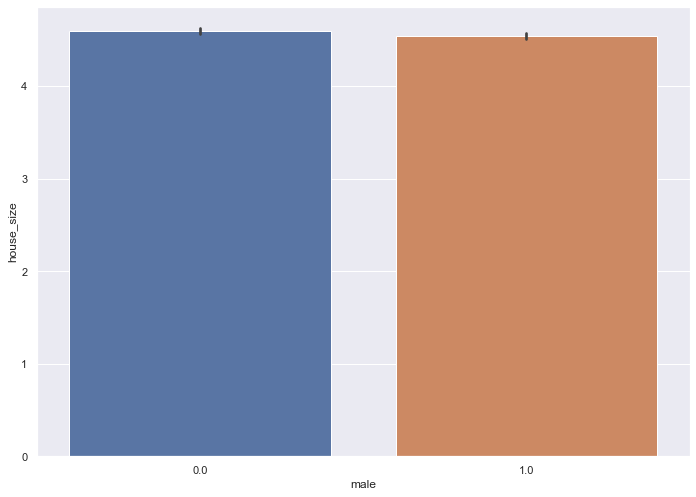

In [44]:
# df = pd.read_stata("canada_test_scr.dta")
y = df["house_size"]
x = df["male"]
model = smf.ols(formula="house_size ~ male", data=df).fit(cov_type='HC3', fit_intercept=False, C=100000)
print(model.summary())

# regression
regression = sp.stats.linregress(x, y)
print(regression)

# plot a bar graph with house_size on the y axis and male on the x axis
sns.barplot(x=x, y=y, data=df)

# find the average house size
avg: float = df.loc[(df["male"] == 1.0)]
avg_female: float = df.loc[(df["male"] == 0.0)]
print(avg["house_size"].mean())
print(avg_female["house_size"].mean())

# Qns 20

You run a regression of math test score on a binary variable indicating whether or not the student lives with both parents. The Standard Error of the Regression is 0.98896. Suppose the math scores in the dataset are now divided by a factor of 700 (i.e. a math score of 1 now becomes 0.00142857). What will the new Standard Error of the Regression be?  Round your answer to 3 significant figures.

In [45]:
new_df = df.copy()
new_df["math_scr"] = new_df["math_scr"] / 700

# run a regression of math_scr on livewithparents
y = df["math_scr"]
x = df["livewithparents"]
model = smf.ols(formula="math_scr ~ livewithparents", data=df).fit(cov_type='HC3', fit_intercept=False, C=100000)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     73.70
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.05e-17
Time:                        13:57:09   Log-Likelihood:                -13780.
No. Observations:                9789   AIC:                         2.756e+04
Df Residuals:                    9787   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1196      0.020     

In [46]:
new_model = smf.ols(formula="math_scr ~ livewithparents", data=new_df).fit(cov_type='HC3', fit_intercept=False, C=100000)
print(new_model.summary())
# find new_model standard errors
print(new_model.bse * 700)

                            OLS Regression Results                            
Dep. Variable:               math_scr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     73.70
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.05e-17
Time:                        13:57:09   Log-Likelihood:                 50348.
No. Observations:                9789   AIC:                        -1.007e+05
Df Residuals:                    9787   BIC:                        -1.007e+05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0002   2.84e-05     